# Ejercicio 3 - guía 5

Sean 𝑋1, . . . , 𝑋𝑛 variables aleatorias Normales(𝜇, 1). Sea 𝜃 = (𝑒^𝜇) y sea 𝜃∗ = (𝑒^𝑋) . Crear un conjunto
de datos utilizando 𝜇 = 5 que tenga 𝑛 = 100 observaciones.

## a)
Utilizar bootstrap para obtener el error estándar y el intervalo de confianza del 95% para 𝜃.

### Desarrollo

Primero genero las 100 observaciones:

In [1]:
from scipy.stats import norm 
import numpy as np

# Planto la semilla para que los resultados sean reproducibles
np.random.seed(19)

mu = 5
n_observaciones = 100
observaciones = np.random.normal(loc=mu, scale=1, size= n_observaciones)

Tenemos que el valor verdadero de 𝜃 es:

In [2]:
print(np.exp(5))

148.4131591025766


Y que su estimador es:

In [3]:
print(np.exp(np.mean(observaciones)))

152.06735774278906


Uso bootstrap para hallar el error estándar del estimador:

In [4]:
from scipy.stats import sem

n = 1000
estimadores = np.zeros(n)
for i in range(n):
    muestra_bootstrap = np.random.choice(observaciones, size= n_observaciones, replace=True)
    estimadores[i] = np.exp(np.mean(muestra_bootstrap))
    
error_estandar = sem(estimadores)
print(f'Error estándar del estimador de 𝑒^𝜇: {error_estandar}')

Error estándar del estimador de 𝑒^𝜇: 0.42589672937359024


Y ahora calculo el intervalo de confianza del 95% para 𝜃:

In [5]:
print(f'Intervalo de confianza de percentil para el estimador {np.percentile(estimadores, [2.5, 97.5])}')

Intervalo de confianza de percentil para el estimador [126.26685469 178.83639823]


## b)
Graficar histograma de las replicaciones bootstrap. Esto es una estimación de la distribución
de 𝜃. Comparar con la verdadera distribución de muestreo de 𝜃.

### Desarrollo

Primero armo un muestreo de 𝜃 a partir de la distribución real para luego poder comparar con bootstrap:

In [6]:
muestreo_real = np.zeros(n)
for i in range(n):
    muestra_real = np.random.normal(loc=mu, scale=1, size= n_observaciones)
    muestreo_real[i] = np.exp(np.mean(muestra_real))

Ahora armo un gráfico comparativo del histograma de las replicaciones bootstrap contra la verdadera distribución de muestreo de 𝜃:

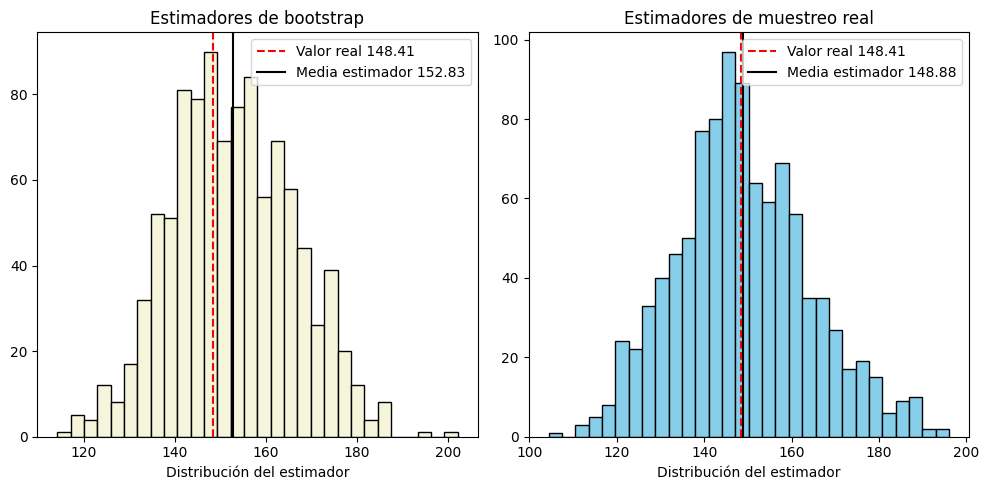

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# En el primer eje hago un histograma de los estimadores de bootstrap
ax[0].hist(estimadores, bins=30, color= 'beige', edgecolor='black')
ax[0].set_title('Estimadores de bootstrap')
ax[0].set_xlabel('Distribución del estimador')
ax[0].axvline(np.exp(mu), color='red', linestyle='--', label=f'Valor real {np.round(np.exp(mu),2)}')
ax[0].axvline(np.mean(estimadores), color='black', linestyle='-', label=f'Media estimador {np.round(np.mean(estimadores), 2)}')
ax[0].legend()

# En el segundo eje hago un histograma de los estimadores de muestreo real
ax[1].hist(muestreo_real, bins=30, color='skyblue', edgecolor='black')
ax[1].set_title('Estimadores de muestreo real')
ax[1].set_xlabel('Distribución del estimador')
ax[1].axvline(np.exp(mu), color='red', linestyle='--', label= f'Valor real {np.round(np.exp(mu),2)}')
ax[1].axvline(np.mean(muestreo_real), color='black', linestyle='-', label=f'Media estimador {np.round(np.mean(muestreo_real), 2)}')
ax[1].legend()

plt.tight_layout() 
plt.show()